In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.externals import joblib

sns.set()

In [93]:
data = pd.read_csv("output\\6trainingdata.csv")

In [94]:
data.shape

(657, 9)

In [63]:
data["home_win"].describe()

count    786.000000
mean       0.567430
std        0.495748
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: home_win, dtype: float64

In [95]:
data[data["home_pct"] == data["away_pct"]]["home_win"].describe()

count    110.000000
mean       0.572727
std        0.496946
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: home_win, dtype: float64

In [154]:
data[data["home_pct"] == 1]["home_win"].mean()

0.8518518518518519

In [97]:
data[data["home_pct"] > data["away_pct"]]["home_win"].describe()

count    263.000000
mean       0.741445
std        0.438675
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: home_win, dtype: float64

In [98]:
data[data["away_pct"] > data["home_pct"]]["home_win"].describe()

count    284.000000
mean       0.415493
std        0.493677
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: home_win, dtype: float64

In [147]:
data[data["home"] == "New Orleans Saints"]["home_win"].describe()

count    22.000000
mean      0.545455
std       0.509647
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: home_win, dtype: float64

In [125]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

def get_model_and_grid():

    #model = MLPClassifier()
    #param_grid = {    
    #}
    
    #model = GaussianNB()
    #param_grid = {
    #}
    
    #model = DecisionTreeClassifier()

    #model = AdaBoostClassifier()
    #param_grid = {
    #    "learning_rate": [0.01, 0.1, 0.5, 1, 10],
    #    "n_estimators": [1, 10, 50, 100]
    #}

    #print("getting model")
    #
    #model = SVC()
    #
    #param_grid = {
    #    "C": [0.01, 0.1, 1, 10, 100],
    #    "kernel": ['linear', 'rbf']
    # }
    
    model = MLPClassifier(max_iter=500)
    param_grid = {
        "alpha": [0.001, 0.01, 0.1, 1],
        "hidden_layer_sizes": [(10), (100), (100,100), (100, 100, 100)]
    }

    return model, param_grid

In [139]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

y = data.home_win
X = data.drop(["home_win", "home", "away"], axis=1, inplace=False)

model, param_grid = get_model_and_grid()

grid = GridSearchCV(model, param_grid, cv=10, return_train_score=True)

grid.fit(X, y)

print(grid.best_score_)
print(grid.best_params_)

model = grid.best_estimator_

y_model = model.predict(X)

confidence = model.predict_proba(X)

0.654490106545
{'alpha': 0.001, 'hidden_layer_sizes': (100, 100, 100)}


In [140]:
def confidence_stats(interval):
    
    correct_count = 0
    total_count = 0
    
    for i,v in enumerate(y_model):
        if np.max(confidence[i]) >= interval:
            total_count += 1
            if y[i] == y_model[i]:
                correct_count += 1
    
    return correct_count, total_count, interval

def render_confidence(stats):
    if stats[1] == 0:
        print(stats[2], " confidence no correct preds found")
    else:
        print(stats[2], stats[0], stats[1], stats[0]/stats[1])

In [141]:
at_80 = render_confidence(confidence_stats(0.7))

at_90 = render_confidence(confidence_stats(0.9))

at_95 = render_confidence(confidence_stats(0.95))

0.7 204 242 0.8429752066115702
0.9 19 20 0.95
0.95 6 6 1.0


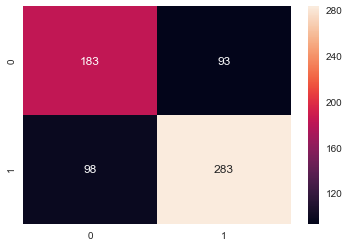

In [142]:
#sns.pairplot(data, hue='home_win')

from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_true=y, y_pred=y_model)

sns.heatmap(mat.T, annot=True, fmt='d')

In [133]:
data.head()

,away,home,away_pct,home_pct,away_pts,home_pts,away_diff,home_diff,home_win
0,New York Jets,New England Patriots,0.166667,0.666667,16.000000,26.666667,-62,31,1
1,Seattle Seahawks,St. Louis Rams,0.500000,0.166667,22.166667,16.833333,20,-49,1
2,Miami Dolphins,Chicago Bears,0.333333,0.500000,20.000000,23.833333,-4,-1,0
3,Cleveland Browns,Jacksonville Jaguars,0.500000,0.000000,22.333333,13.500000,19,-104,1
4,Cincinnati Bengals,Indianapolis Colts,0.500000,0.666667,16.166667,31.500000,21,53,1


In [143]:
X.head()

,away_pct,home_pct,away_pts,home_pts,away_diff,home_diff
0,0.166667,0.666667,16.000000,26.666667,-62,31
1,0.500000,0.166667,22.166667,16.833333,20,-49
2,0.333333,0.500000,20.000000,23.833333,-4,-1
3,0.500000,0.000000,22.333333,13.500000,19,-104
4,0.500000,0.666667,16.166667,31.500000,21,53


In [155]:
MLPClassifier?